### Deep Learning Hw1

## Installation
```shell
pip install -r requirements.txt
```


### Dependency
- requirement.txt
```shell
absl-py==2.1.0
asttokens==2.4.1
astunparse==1.6.3
certifi==2024.8.30
charset-normalizer==3.4.0
colorama==0.4.6
comm==0.2.2
contourpy==1.3.0
cycler==0.12.1
debugpy==1.8.7
decorator==5.1.1
exceptiongroup==1.2.2
executing==2.1.0
flatbuffers==24.3.25
fonttools==4.54.1
gast==0.6.0
google-pasta==0.2.0
grpcio==1.67.0
h5py==3.12.1
idna==3.10
ipykernel==6.29.5
ipython==8.29.0
jedi==0.19.1
joblib==1.4.2
jupyter_client==8.6.3
jupyter_core==5.7.2
keras==3.6.0
kiwisolver==1.4.7
libclang==18.1.1
Markdown==3.7
markdown-it-py==3.0.0
MarkupSafe==3.0.2
matplotlib==3.9.2
matplotlib-inline==0.1.7
mdurl==0.1.2
ml-dtypes==0.4.1
namex==0.0.8
nest-asyncio==1.6.0
numpy==2.0.2
opt_einsum==3.4.0
optree==0.13.0
packaging==24.1
parso==0.8.4
pillow==11.0.0
platformdirs==4.3.6
prompt_toolkit==3.0.48
protobuf==5.28.3
psutil==6.1.0
pure_eval==0.2.3
Pygments==2.18.0
pyparsing==3.2.0
python-dateutil==2.9.0.post0
pywin32==308
pyzmq==26.2.0
requests==2.32.3
rich==13.9.3
scikit-learn==1.5.2
scipy==1.14.1
six==1.16.0
stack-data==0.6.3
tensorboard==2.18.0
tensorboard-data-server==0.7.2
tensorflow==2.18.0
tensorflow-io-gcs-filesystem==0.31.0
tensorflow_intel==2.18.0
termcolor==2.5.0
threadpoolctl==3.5.0
tornado==6.4.1
traitlets==5.14.3
typing_extensions==4.12.2
urllib3==2.2.3
wcwidth==0.2.13
Werkzeug==3.0.6
wrapt==1.16.0
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# Load the .mat file
data = loadmat('data/data.mat')
x = data['x'].flatten()
y = data['y'].flatten()

print(x)
print(x.shape)
print(y)
print(y.shape)


[0.    0.001 0.002 ... 0.998 0.999 1.   ]
(1001,)
[1.11889485 1.24080293 1.2305603  ... 7.44260211 7.36491736 7.34314766]
(1001,)


Q1-1：Scatter the x, y data to visualize the data

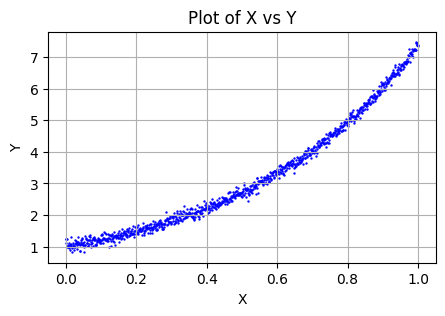

In [2]:
# plotting data: Scatter for discrete datas
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s= 0.5 ,color='blue', label='Data')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of X vs Y')

# Show the plot
plt.grid(True)
plt.show()

Q1-2：Compute the least square of line $𝑦 = 𝜃_𝟎 + 𝑥𝜃_𝟏$
- using the given data and overlay the line on the given data.

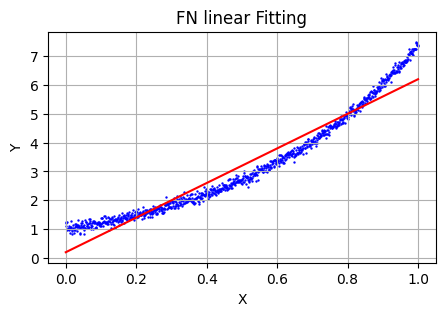

In [3]:
# Plot the data using scatter
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=0.5, color='blue', label='Data')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('FN linear Fitting')

# Compute the least squares line using polyfit
theta_1, theta_0 = np.polyfit(x, y, 1)
y_fit_linear = theta_0 + theta_1 * x

# Plot the least squares line
plt.plot(x, y_fit_linear, color='red', label='Least Squares Line')
plt.grid(True)
plt.show()

Q1-3：Compute the least square of curve $𝑦 = 𝜃_𝟎 + 𝑥𝜃_𝟏 + 𝑥^2𝜃_𝟐$
- using the given data and overlay the line on the given data.

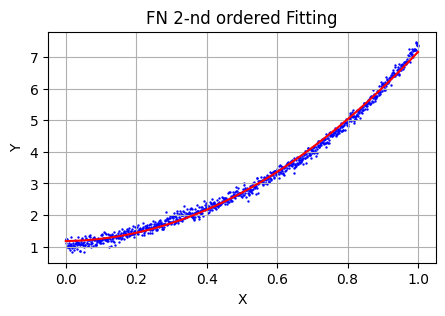

In [4]:
# Plot the data using scatter
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=0.5, color='blue', label='Data')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('FN 2-nd ordered Fitting')

# Compute the least squares line using polyfit
theta_2, theta_1, theta_0 = np.polyfit(x, y, 2)
y_fit_parabola = theta_0 + theta_1 * x + theta_2 * x ** 2

# Plot the least squares line
plt.plot(x, y_fit_parabola, color='red', label='Least Squares Line')
plt.grid(True)
plt.show()

Q1-4：Compute the least square of curve $𝑦 = 𝜃_𝟎 + 𝑥𝜃_𝟏 + 𝑥^2𝜃_𝟐 + 𝑥^3𝜃_3 + 𝑥^4𝜃_4$
- using the given data and overlay the line on the given data.

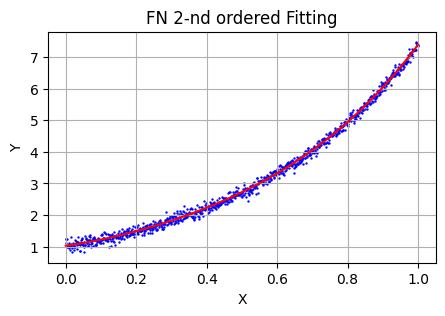

In [5]:
# Plot the data using scatter
plt.figure(figsize=(5, 3))
plt.scatter(x, y, s=0.5, color='blue', label='Data')

# Add labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('FN 2-nd ordered Fitting')

# Compute the least squares line using polyfit
theta_4, theta_3, theta_2, theta_1, theta_0 = np.polyfit(x, y, 4)
y_fit_quartic = theta_0 + theta_1 * x + theta_2 * x**2 + theta_3 * x**3 + theta_4 * x**4

# Plot the least squares line
plt.plot(x, y_fit_quartic, color='red', label='Least Squares Line')
plt.grid(True)
plt.show()

Q1-5:  which model (line, parabola, or quartic curve) is most appropriate for
this dataset \
( justify by computing the MSE )
- Answer：Quartic curve，since it has the minimum MSE：0.01041

In [6]:
from sklearn.metrics import mean_squared_error

# Compute MSE score of linear, parabola, quartic
mse_score = {
    "linear":   mean_squared_error(y, y_fit_linear),
    "parabola": mean_squared_error(y, y_fit_parabola),
    "quartic":  mean_squared_error(y, y_fit_quartic)
}

# Compare MSE of different models
for k in mse_score.keys():
    print(f"MSE of {k.capitalize():<10} Fit: {mse_score[k] :.5f}" )

min_key:str = min(mse_score, key=lambda k: mse_score[k])
print(f"Min MSE is {min_key.capitalize()}, score: {mse_score[min_key] :.5f}" )

MSE of Linear     Fit: 0.20581
MSE of Parabola   Fit: 0.01574
MSE of Quartic    Fit: 0.01041
Min MSE is Quartic, score: 0.01041


Q2：Plot the resulting 200 linear regression lines and 200 quartic curves 
- Linear lines：$(𝑦 = 𝜃_𝟎 + 𝑥𝜃_𝟏)$ 
- Quartic curves：$(𝑦 = 𝜃_𝟎 + 𝑥𝜃_𝟏 + 𝑥^2𝜃_𝟐 + 𝑥^3𝜃_3 + 𝑥^4𝜃_4) 
- Explain the visualizations and how the spread and behavior of curves and lines

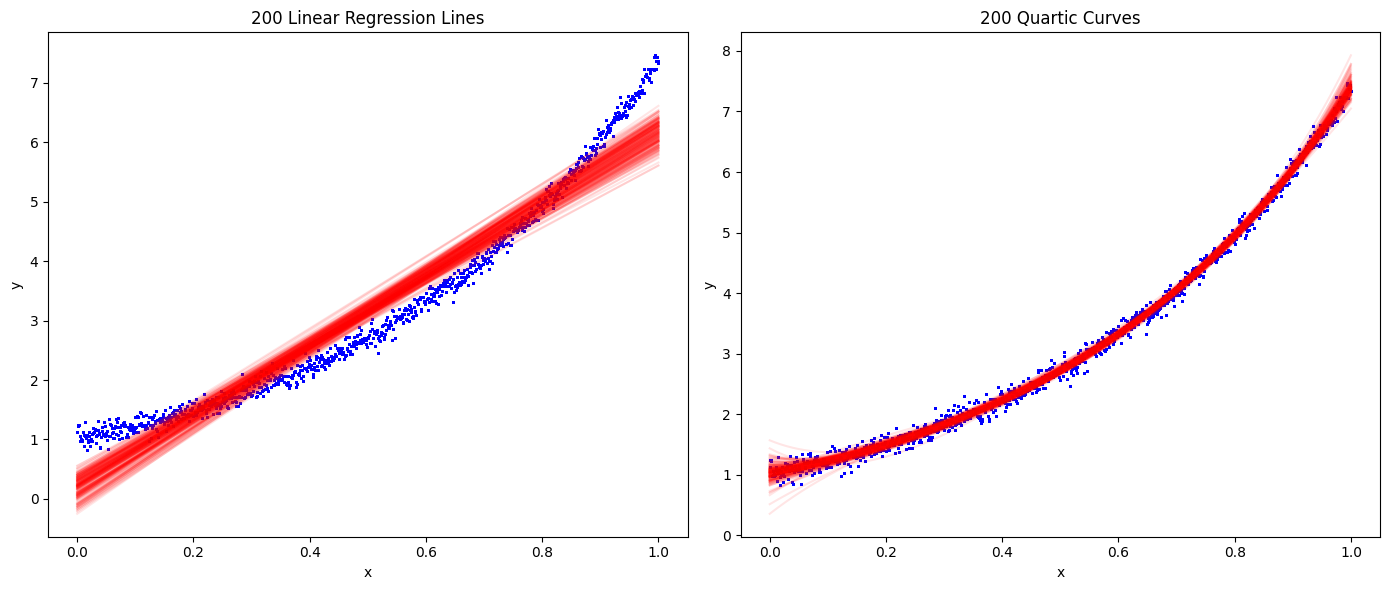

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Prepare for plotting
plt.figure(figsize=(14, 6))

# Plot for linear regression lines
plt.subplot(1, 2, 1)
plt.title('200 Linear Regression Lines')
plt.xlabel('x')
plt.ylabel('y')

# Plot for quartic curves
plt.subplot(1, 2, 2)
plt.title('200 Quartic Curves')
plt.xlabel('x')
plt.ylabel('y')

# Number of repetitions
n_times = 200
n_samples = 30

# Repeat the process 200 times
for _ in range(n_times):
    # Randomly select 30 samples
    sample_indices = np.random.choice(len(x), n_samples, replace=False)
    x_sample = x[sample_indices].flatten()
    y_sample = y[sample_indices].flatten()
    
    # Fit a linear model using polyfit
    theta_1, theta_0 = np.polyfit(x_sample, y_sample, 1)
    y_fit_linear = theta_0 + theta_1 * x
    
    # Fit a quartic curve model using polyfit
    theta_4, theta_3, theta_2, theta_1, theta_0 = np.polyfit(x_sample, y_sample, 4)
    y_fit_quartic = theta_0 + theta_1 * x + theta_2 * x**2 + theta_3 * x**3 + theta_4 * x**4
    
    # Plot the linear regression line
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, s=0.5, color='blue', label='Data')
    plt.plot(x, y_fit_linear, color='red', alpha=0.1)

    # Plot the quartic curve
    plt.subplot(1, 2, 2)
    plt.scatter(x, y, s=0.5, color='blue', label='Data')
    plt.plot(x, y_fit_quartic, color='red', alpha=0.1)

# Show the plots
plt.tight_layout()
plt.show()

Q2： Analyze Part：
- Explain the visualizations in the context of bias and variance, discussing how the spread and behavior of the curves or lines relate to the concepts of underfitting, overfitting, and model complexity

Explaination：
- Linear Regression：
    Linear model is relatively simple, with only two parameters to fit. This simplicity usually results in "**high bias but low variance**".
    However, linear model are too simple to capture complex patterns and leading to "**underfitting**"
- Quartic Curve：
    In comparision with linear model, Quartic models usually have "**lower bias and higher variance**", since they can capture more complex patterns. 
    However, the flexibility can lead to "**overfitting**", where the model captures noise rather than the true pattern and have poor performance on new data.
    It is worth to mension that Quartic model can still underfit if the true relationship is even more complex.

Q3-1：Plot the 2D data points and the decision boundary to illustrate the model's seperation

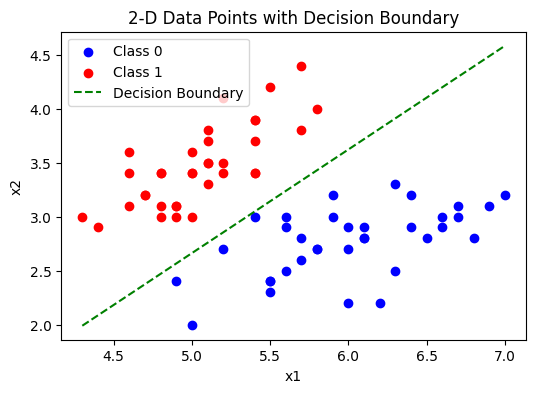

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load training data from train.mat
data = loadmat('data/train.mat')
x1 = data['x1'].flatten()
x2 = data['x2'].flatten()
y = data['y'].flatten()

# Combine x1 and x2 into a single 2-D array for training X
X_train = np.column_stack((x1, x2))

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y)

# Retrieve model parameters
theta0 = model.intercept_[0]
theta1, theta2 = model.coef_[0]

# Plot the data points and decision boundary
plt.figure(figsize=(6, 4))
plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='Class 0')
plt.scatter(x1[y == 1], x2[y == 1], color='red', label='Class 1')

# Decision boundary line of training data
x_boundary = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
# Compute the decision boundary (x2 values) based on theta values
y_boundary = -(theta0 + theta1 * x_boundary) / theta2

plt.plot(x_boundary, y_boundary, color='green', linestyle='--', label='Decision Boundary')

# Figure information
plt.title('2-D Data Points with Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Q3-2：Evaluate the model on test dataset and report the test error
- Test Error: 0.00%

Test Error: 0.00%


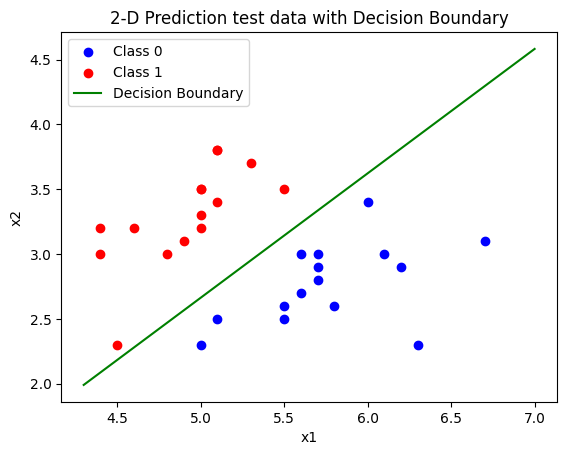

In [9]:
# Load training data from train.mat
data = loadmat('data/test.mat')
x1_test = data['x1'].flatten()
x2_test = data['x2'].flatten()
y_test = data['y'].flatten()

# Combine x1 and x2 into a single 2-D array for training X
X_test = np.column_stack((x1_test, x2_test))

# Predict and calculate test error
predictions = model.predict(X_test)
test_error = np.mean(predictions != y_test) * 100
print(f'Test Error: {test_error:.2f}%')

# Plotting the testing data point and the prediction boundary line
plt.scatter(x1_test[y_test == 0], x2_test[y_test == 0], color='blue', label='Class 0')
plt.scatter(x1_test[y_test == 1], x2_test[y_test == 1], color='red', label='Class 1')
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')

# Figure information
plt.title('2-D Prediction test data with Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

Q4：Download the MNIST dataset using the following example code:

In [10]:
from __future__ import print_function
import keras
from keras.datasets import mnist
# input image dimensions 28×28
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Q4-1：Please randomly choose 5,000 handwritten images from either the training or the testing dataset to construct your own dataset, with 500 data samples for each digit.

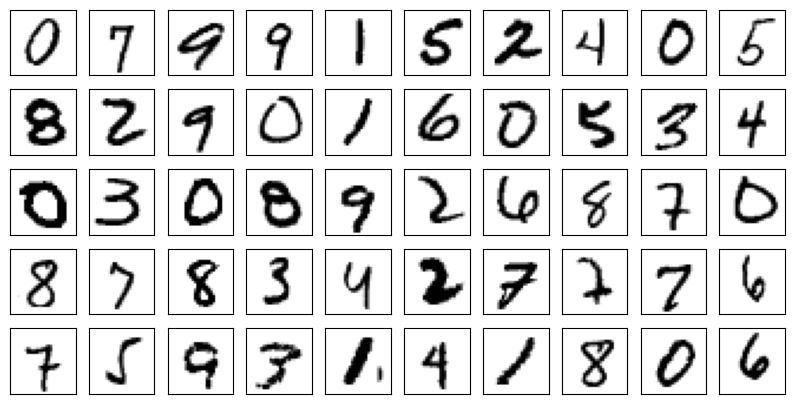

In [12]:
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and preprocess the MNIST dataset
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Step 2: Construct a custom dataset with 500 samples per digit from the test set
num_samples_per_digit = 500
custom_x = []
custom_y = []

for digit in range(10):
    indices = np.where(y_test == digit)[0]
    selected_indices = np.random.choice(indices, num_samples_per_digit, replace=False)
    custom_x.append(x_test[selected_indices])
    custom_y.append(y_test[selected_indices])

custom_x = np.concatenate(custom_x)
custom_y = np.concatenate(custom_y)

# Step 3: Shuffle the custom dataset (optional but recommended)
custom_x, custom_y = shuffle(custom_x, custom_y, random_state=0)

# Step 4: Display 50 images from the custom dataset
amount = 50
lines = 5
columns = 10
fig = plt.figure(figsize=(10, 5))

for i in range(amount):
    ax = fig.add_subplot(lines, columns, 1 + i)
    plt.imshow(custom_x[i], cmap='binary')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()

Q4-2：Apply PCA (Principal Component Analysis) to reduce the 784-dimensional
data to 500, 300, 100, and 50 dimensions. 
- For each reduction, show ten decoded results for each digit and analyze how the data reconstruction changes with decreasing dimensions.
- Interpret the results by discussing how the dimensionality reduction affects the quality of the decoded images and explain any observed trade-offs between dimensionality and image clarity.

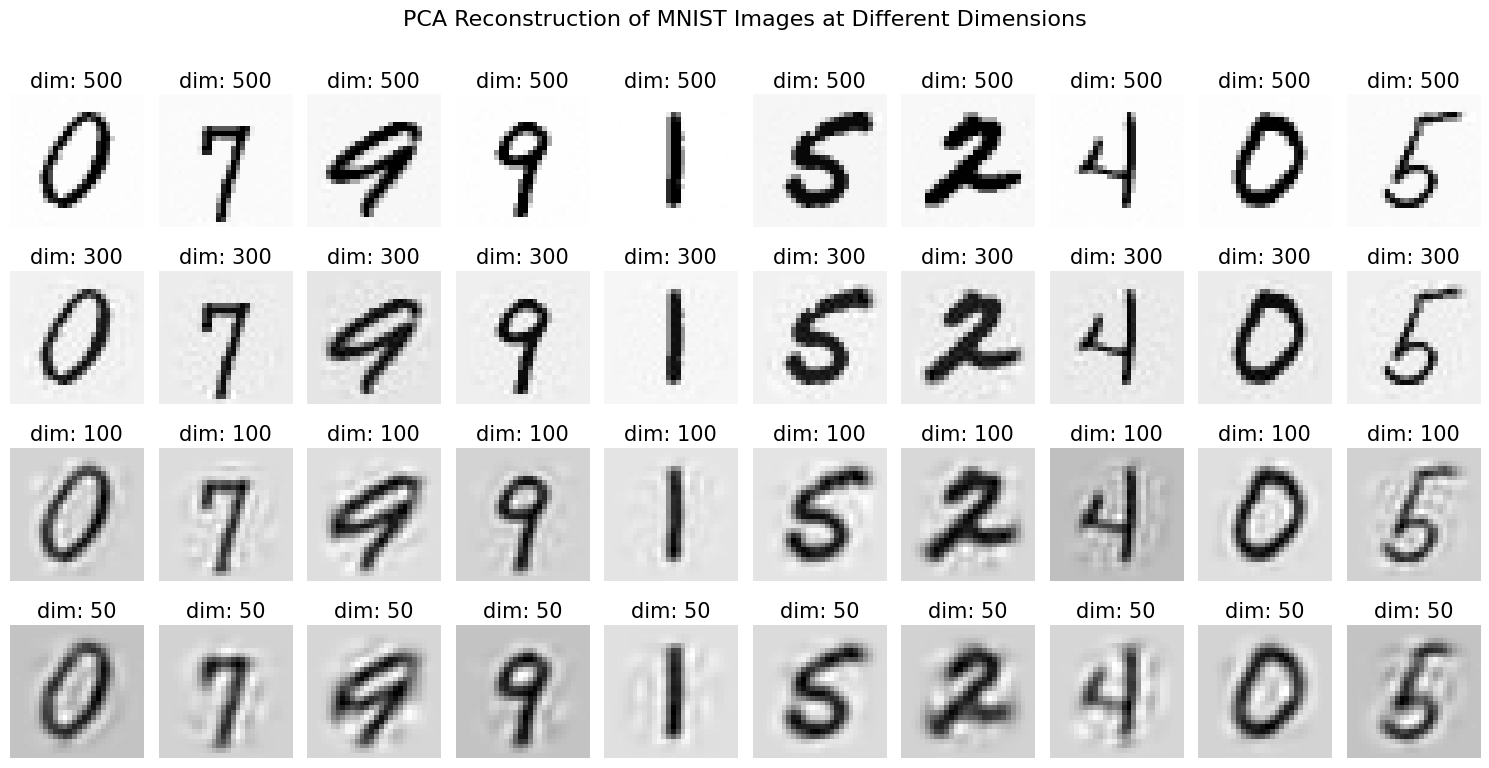

In [29]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 1: Flatten the dataset and apply PCA to reduce it to 2D
x_flattened = custom_x.reshape(custom_x.shape[0], -1)

# Define target PCA dimensions
dimensions = [500, 300, 100, 50]

# Function to perform PCA, reduce dimensions, and reconstruct
def pca_reconstruct_and_display(x_data, dimensions, num_samples=10):
    fig, axs = plt.subplots(len(dimensions), num_samples, figsize=(15, 8))
    
    for i, dim in enumerate(dimensions):
        # Step 2: Apply PCA with the specified dimension
        pca = PCA(n_components=dim)
        x_reduced = pca.fit_transform(x_data)
        x_reconstructed = pca.inverse_transform(x_reduced)
        
        # Step 4: Display ten reconstructed images per dimension
        for j in range(num_samples):
            axs[i, j].imshow(x_reconstructed[j].reshape(28, 28), cmap='binary')
            axs[i, j].axis('off')
            # Add dimension explanation above each sample image
            axs[i, j].set_title(f'dim: {dim}', fontsize=15, pad=5)

    plt.suptitle("PCA Reconstruction of MNIST Images at Different Dimensions", size=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)  # Adjust the title position
    plt.show()

# Display 10 reconstructed images per digit for each dimension reduction
pca_reconstruct_and_display(x_flattened, dimensions)

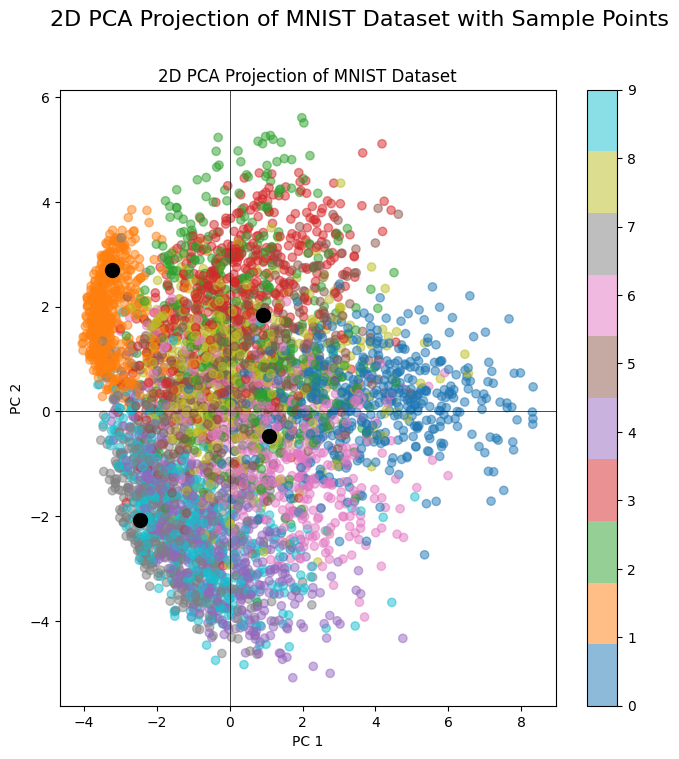

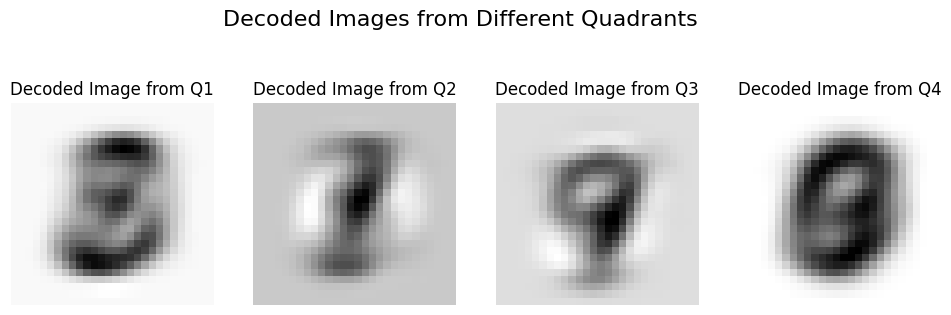

In [45]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Assuming custom_x and custom_y are already defined as the MNIST dataset
# Step 1: Flatten the dataset and apply PCA to reduce it to 2D
x_flattened = custom_x.reshape(custom_x.shape[0], -1)
pca_2d = PCA(n_components=2)
x_2d = pca_2d.fit_transform(x_flattened)

# Step 2: Plot the 2D projection to visualize quadrants
plt.figure(figsize=(8, 8))
plt.scatter(x_2d[:, 0], x_2d[:, 1], c=custom_y, cmap='tab10', alpha=0.5)
plt.colorbar()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title("2D PCA Projection of MNIST Dataset")
plt.xlabel("PC 1")
plt.ylabel("PC 2")

# Step 3: Sample and decode images from each quadrant
quadrants = {
    "Q1": (x_2d[:, 0] > 0) & (x_2d[:, 1] > 0),
    "Q2": (x_2d[:, 0] < 0) & (x_2d[:, 1] > 0),
    "Q3": (x_2d[:, 0] < 0) & (x_2d[:, 1] < 0),
    "Q4": (x_2d[:, 0] > 0) & (x_2d[:, 1] < 0),
}

sample_indices = []
decoded_images = []
for quad_name, condition in quadrants.items():
    # Pick a random index from each quadrant to ensure different samples
    valid_indices = np.where(condition)[0]
    sample_index = np.random.choice(valid_indices)
    sample_indices.append(sample_index)
    
    # Decode the sample image
    x_reduced_sample = x_2d[sample_index].reshape(1, -1)
    x_decoded_sample = pca_2d.inverse_transform(x_reduced_sample)
    decoded_images.append(x_decoded_sample)

    # Mark the position of the decoded image on the PCA projection
    plt.plot(x_2d[sample_index, 0], x_2d[sample_index, 1], 'ko', markersize=10)  # 'ko' for black dot

plt.suptitle("2D PCA Projection of MNIST Dataset with Sample Points", size=16)
plt.show()

# Step 4: Plot the decoded images in a separate figure
fig, axs = plt.subplots(1, 4, figsize=(12, 4))

for i, x_decoded_sample in enumerate(decoded_images):
    axs[i].imshow(x_decoded_sample.reshape(28, 28), cmap='binary')
    axs[i].axis('off')
    axs[i].set_title(f"Decoded Image from {list(quadrants.keys())[i]}")

plt.suptitle("Decoded Images from Different Quadrants", size=16)
plt.show()
